In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame = True)
df = data.frame
df.head()

df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

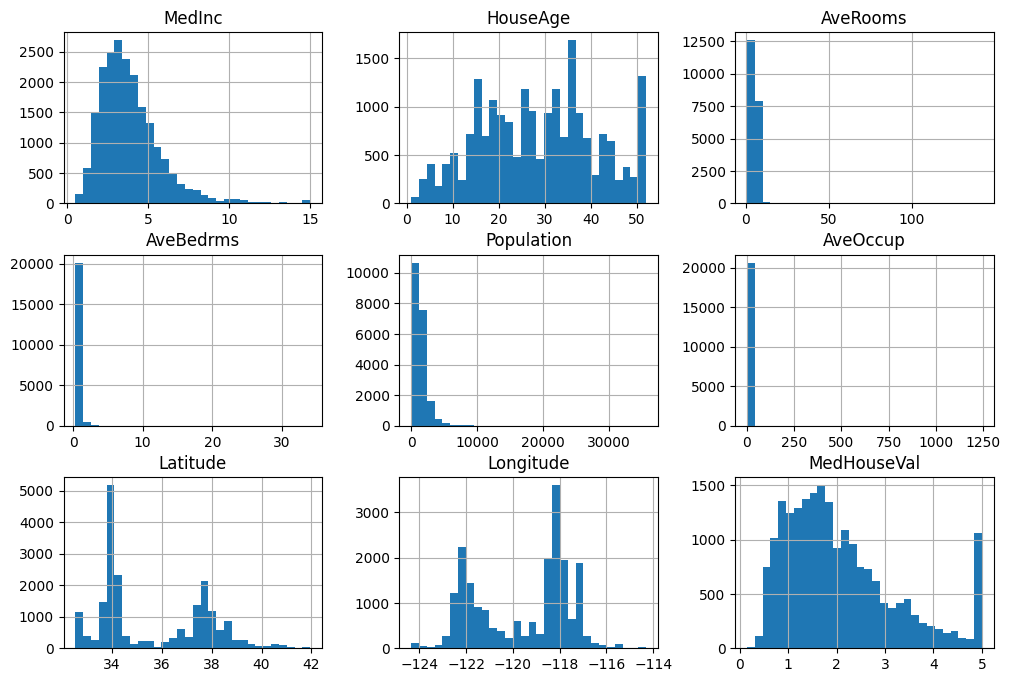

In [4]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(12,8))
plt.show()


<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

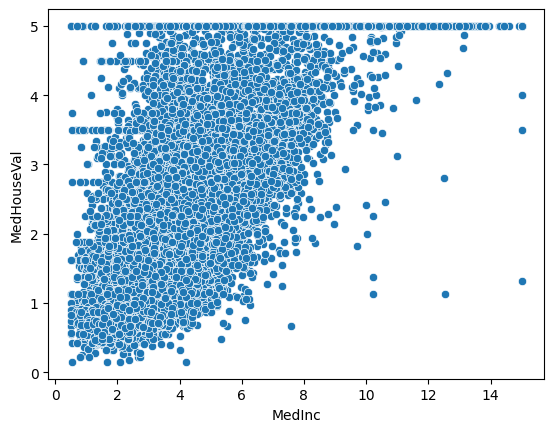

In [6]:
import seaborn as sns
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df)


<Axes: >

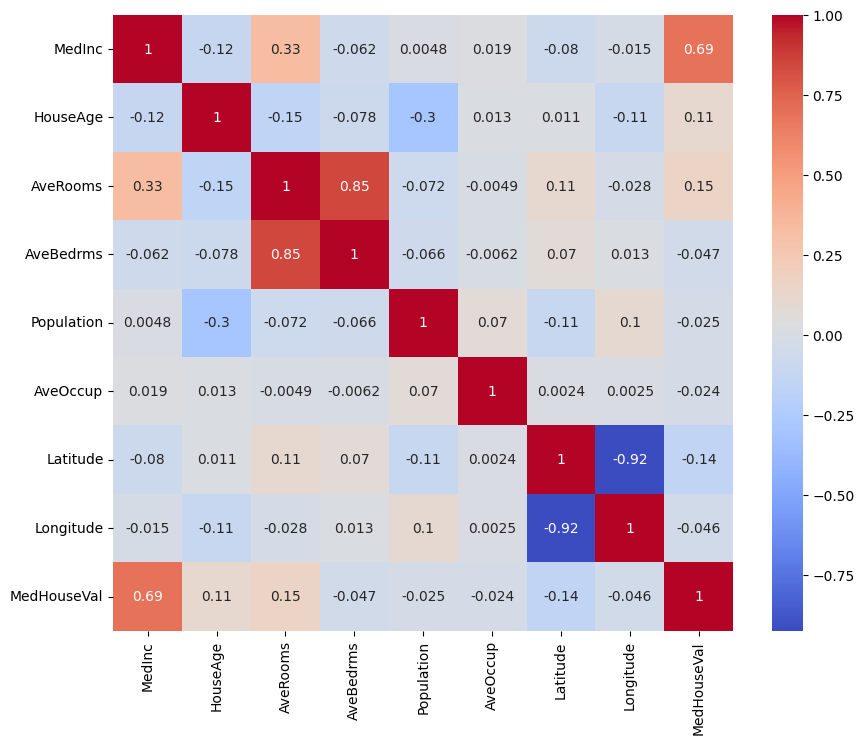

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='MedHouseVal')   # features (inputs)
y = df['MedHouseVal']                # target (output)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # learn scaling from training data
X_test_scaled = scaler.transform(X_test)        # apply same transformation to test


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()        # create model
lr.fit(X_train_scaled, y_train)  # learn from data

y_pred = lr.predict(X_test_scaled)  # predict on unseen data


In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"R²: {r2:.3f}")


MSE: 0.556
R²: 0.576


In [12]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=6, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree R²:", r2_score(y_test, y_pred_tree))


Decision Tree R²: 0.6205125146233951


In [13]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    n_estimators=100,  # number of trees
    random_state=42
)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
print("Random Forest R²:", r2_score(y_test, y_pred_forest))


Random Forest R²: 0.8048502475905297


In [14]:
import numpy as np

importances = forest.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

for idx in indices:
    print(f"{features[idx]}: {importances[idx]:.3f}")



MedInc: 0.525
AveOccup: 0.139
Latitude: 0.089
Longitude: 0.089
HouseAge: 0.055
AveRooms: 0.044
Population: 0.031
AveBedrms: 0.030
